# Steady State Comparison
We want to compare steady states of
- One-Sector Model (only formal sector)
- Two-Sector without Labor Mobility
- Two-Sector with Labor Mobility

## Experiment 1: Labor market implications
1. Higher unemployment risk in informal sector
2. Lower wage rate in informal sector

## Experiment 2: Financial constraints
1. No Borrowing Constraint in Formal sector, but in informal sector
2. Higher interest rate in Formal sector



In [19]:
from ConsIndShockModel_HANK import IndShockConsumerType 
from TwoSectorModel_HANK import TwoSectorMarkovConsumerType
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Define Baseline (2 Identical Sectors)

In [20]:
### Define shared parameters
Rfree_f = 0.03
Rfree_i = 0.03
PermShkStd_f = 0.06
PermShkStd_i = 0.06
TranShkStd_f = 0.2
TranShkStd_i = 0.2
PermGroFac_f = 1.01
PermGroFac_i = 1.01
UnempPrb_f = 0.1
UnempPrb_i = 0.1
IncUnemp_f = 0.7
IncUnemp_i = 0.0
taxrate_f = 0.0
taxrate_i = 0.0
labor_f = 0.8
labor_i = 0.8 #0.6
wage_f = 1.0
wage_i = 1.0
BoroCnstArt_f = 0.0
BoroCnstArt_i = 0.0
LivPrb_f = .99375
LivPrb_i = .99375
PermGroFac_f = 1.01
PermGroFac_i = 1.01

cycles = 0
T_cycle = 1

In [21]:
### Dictionary to be passed to the consumer type
HANK_Dict_Formal = {
    "cycles": cycles,
    "T_cycle": T_cycle,
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + Rfree_f,                    # Interest factor on assets
    "LivPrb" : [LivPrb_f] * T_cycle,                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [UnempPrb_f] * T_cycle,                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 7,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [TranShkStd_f] * T_cycle,                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 7,    
    "PermGroFac" : [PermGroFac_f] * T_cycle,                  # Permanent income growth factor
    
    # HANK params
    "taxrate" : [taxrate_f] * T_cycle, # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [labor_f] * T_cycle,
    "wage": [wage_f] * T_cycle,    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : UnempPrb_f,                      # Probability of unemployment while working
    "IncUnemp" :  IncUnemp_f,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": BoroCnstArt_f,
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict_Formal['TranShkMean_Func'] = [function] * T_cycle

In [22]:
### Dictionary to be passed to the consumer type
HANK_Dict_Informal = {
    "cycles": cycles,
    "T_cycle": T_cycle,
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + Rfree_i,                    # Interest factor on assets
    "LivPrb" : [LivPrb_i] * T_cycle,                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [UnempPrb_i] * T_cycle,                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 7,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [TranShkStd_i] * T_cycle,                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 7,    
    "PermGroFac" : [PermGroFac_i] * T_cycle,                  # Permanent income growth factor
    
    # HANK params
    "taxrate" : [taxrate_i] * T_cycle, # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [labor_i] * T_cycle,
    "wage": [wage_i] * T_cycle,    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : UnempPrb_i,                      # Probability of unemployment while working
    "IncUnemp" :  IncUnemp_i,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": BoroCnstArt_i,
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict_Informal['TranShkMean_Func'] = [function] * T_cycle

In [23]:
# Define the Markov transition matrix for sector f(ormal) to i(nformal)
p_f_to_i = 0.0
p_i_to_f = 0.5
p_f_to_f = 1 - p_f_to_i
p_i_to_i = 1 - p_i_to_f

MrkvArray = np.array(
    [
        [
            p_f_to_f
        ,
            p_f_to_i
        ],
        [
           p_i_to_f
        ,
            p_i_to_i
        ]
    ]
)

NSectors = 2

Formal_Size = 0.5

In [24]:
### Dictionary to be passed to the consumer type
HANK_Dict_TwoSector = {
    "cycles": cycles,
    "T_cycle": T_cycle,
    # Parameters shared with the perfect foresight model
    "Rfree": [np.array([1.0 + Rfree_f, 1.0 + Rfree_i])] * T_cycle,                    # Interest factor on assets
    "LivPrb" : [np.array([LivPrb_f, LivPrb_i])] * T_cycle,                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [np.array([UnempPrb_f, UnempPrb_i])] * T_cycle,                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 7,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [np.array([TranShkStd_f, TranShkStd_i])] * T_cycle,                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 7,    
    "PermGroFac": [np.array([PermGroFac_f, PermGroFac_i])] * T_cycle,                  # Permanent income growth factor

    # HANK params
    "taxrate" : [np.array([taxrate_f, taxrate_i])] * T_cycle, # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [np.array([labor_f, labor_i])] * T_cycle,
    "wage": [np.array([wage_f, wage_i])] * T_cycle,    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : [np.array([UnempPrb_f, UnempPrb_i])] * T_cycle,                      # Probability of unemployment while working
    "IncUnemp" :  [np.array([IncUnemp_f, IncUnemp_i])] * T_cycle,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": [BoroCnstArt_f, BoroCnstArt_i],
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     

    ### Markov Parameters
    "MrkvArray": [MrkvArray]* T_cycle,  # Transition Matrix for Markov Process
    "global_markov": False,  # If True, then the Markov Process is the same for all agents
    "MrkvPrbsInit": [Formal_Size, 1 - Formal_Size],
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict_TwoSector['TranShkMean_Func'] = [function] * T_cycle

## Define Agents and create Steady State Values

In [25]:
Agent_formal_Baseline = IndShockConsumerType(**HANK_Dict_Formal, verbose=False)
Agent_formal_Baseline.solve()
# A_SS_Formal_Baseline, C_SS_Formal_Baseline = Agent_formal_Baseline.compute_steady_state()

In [26]:
Agent_informal_Baseline = IndShockConsumerType(**HANK_Dict_Informal, verbose=False)
Agent_informal_Baseline.solve()
# A_SS_Informal_Baseline, C_SS_Informal_Baseline = Agent_informal_Baseline.compute_steady_state()

In [27]:
Agent_TwoSector_Baseline = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector)


In [28]:
# Agent_TwoSector_Baseline.update()
Agent_TwoSector_Baseline.solve()
# A_SS_TwoSector_Baseline, C_SS_TwoSector_Baseline = Agent_TwoSector_Baseline.compute_steady_state()

In [29]:
Agent_TwoSector_Baseline.mMin

1e-05

In [30]:
vars(Agent_TwoSector_Baseline)

{'parameters': {'cycles': 0,
  'CRRA': 2.0,
  'Rfree': [array([1.03, 1.03])],
  'DiscFac': 0.96,
  'LivPrb': [array([0.99375, 0.99375])],
  'PermGroFac': [array([1.01, 1.01])],
  'BoroCnstArt': [0.0, 0.0],
  'MaxKinks': 400,
  'AgentCount': 10000,
  'aNrmInitMean': 0.0,
  'aNrmInitStd': 1.0,
  'pLvlInitMean': 0.0,
  'pLvlInitStd': 0.0,
  'PermGroFacAgg': 1.0,
  'T_age': None,
  'T_cycle': 1,
  'PerfMITShk': False,
  'aXtraMin': 0.001,
  'aXtraMax': 500,
  'aXtraNestFac': 3,
  'aXtraCount': 100,
  'aXtraExtra': [None],
  'PermShkStd': [array([0.1, 0.1])],
  'PermShkCount': 7,
  'TranShkStd': [array([0.2, 0.2])],
  'TranShkCount': 7,
  'UnempPrb': [array([0.1, 0.1])],
  'UnempPrbRet': 0.005,
  'IncUnemp': [array([0.7, 0. ])],
  'IncUnempRet': 0.0,
  'tax_rate': 0.0,
  'T_retire': 0,
  'vFuncBool': False,
  'CubicBool': False,
  'neutral_measure': False,
  'NewbornTransShk': False,
  'taxrate': [array([0., 0.])],
  'labor': [array([0.8, 0.8])],
  'wage': [array([1., 1.])],
  'mCount': 200

In [31]:
vars(Agent_informal_Baseline)

{'parameters': {'cycles': 0,
  'CRRA': 2.0,
  'Rfree': 1.03,
  'DiscFac': 0.96,
  'LivPrb': [0.99375],
  'PermGroFac': [1.01],
  'BoroCnstArt': 0.0,
  'MaxKinks': 400,
  'AgentCount': 10000,
  'aNrmInitMean': 0.0,
  'aNrmInitStd': 1.0,
  'pLvlInitMean': 0.0,
  'pLvlInitStd': 0.0,
  'PermGroFacAgg': 1.0,
  'T_age': None,
  'T_cycle': 1,
  'PerfMITShk': False,
  'aXtraMin': 0.001,
  'aXtraMax': 500,
  'aXtraNestFac': 3,
  'aXtraCount': 100,
  'aXtraExtra': [None],
  'PermShkStd': [0.1],
  'PermShkCount': 7,
  'TranShkStd': [0.2],
  'TranShkCount': 7,
  'UnempPrb': 0.1,
  'UnempPrbRet': 0.005,
  'IncUnemp': 0.0,
  'IncUnempRet': 0.0,
  'tax_rate': 0.0,
  'T_retire': 0,
  'vFuncBool': False,
  'CubicBool': False,
  'neutral_measure': False,
  'NewbornTransShk': False,
  'HANK': True,
  'taxrate': [0.0],
  'labor': [0.8],
  'wage': [1.0],
  'mCount': 200,
  'mMax': 500,
  'mMin': 1e-05,
  'mFac': 3,
  'TranShkMean_Func': [<function __main__.function(taxrate, labor, wage)>]},
 'solution_term

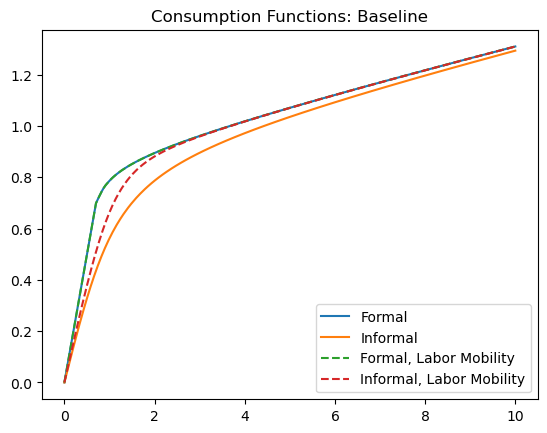

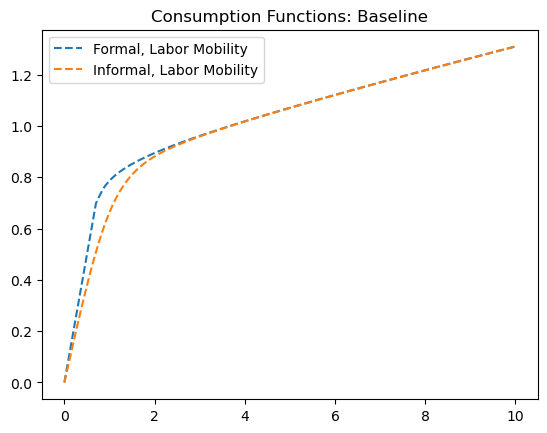

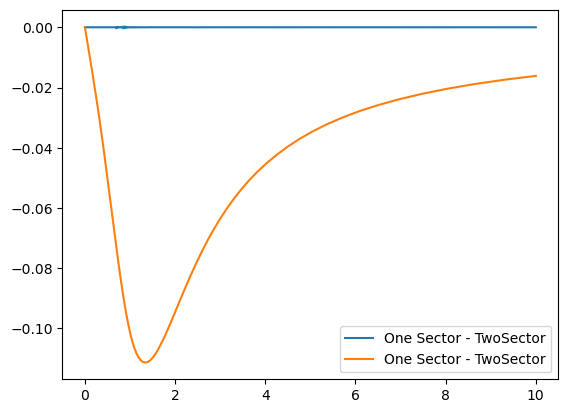

In [32]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_Baseline.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.title('Consumption Functions: Baseline')
# plt.savefig('../../figures/Consumption_Functions_Baseline.png')
plt.show()

# plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Formal')
# plt.plot(mGrid, Agent_informal_Baseline.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.title('Consumption Functions: Baseline')
# plt.savefig('../../figures/Consumption_Functions_Baseline.png')
plt.show()


# Difference
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid) - Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), label='One Sector - TwoSector')
plt.plot(mGrid, Agent_informal_Baseline.solution[0].cFunc(mGrid) - Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), label='One Sector - TwoSector')
plt.legend()
plt.show()


In [33]:
vars(Agent_formal_Baseline.IncShkDstn[0])

{'_seed': 1826701614,
 '_rng': Generator(PCG64) at 0x17782794820,
 'pmv': array([0.01428571, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01428571, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01428571, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01428571,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01428571, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01428571, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01428571, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735]),
 'atoms': array([[0.85043016, 0.85043016, 0.85043016, 0.85043016, 0.85043016,
         0.85043016, 0.85043016, 0.85043016, 0.91862319, 0.91862319,
         0

In [34]:
vars(Agent_TwoSector_Baseline.IncShkDstn[0][0])

{'_seed': 1826701614,
 '_rng': Generator(PCG64) at 0x177831C6580,
 'pmv': array([0.01428571, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01428571, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01428571, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01428571,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01428571, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01428571, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01428571, 0.01836735,
        0.01836735, 0.01836735, 0.01836735, 0.01836735, 0.01836735,
        0.01836735]),
 'atoms': array([[0.85043016, 0.85043016, 0.85043016, 0.85043016, 0.85043016,
         0.85043016, 0.85043016, 0.85043016, 0.91862319, 0.91862319,
         0

In [35]:
Agent_formal_Baseline.IncShkDstn[0].atoms - Agent_TwoSector_Baseline.IncShkDstn[0][0].atoms

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
stop

NameError: name 'stop' is not defined

In [ ]:
Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid)

array([0.        , 0.01001001, 0.02002002, 0.03003003, 0.04004004,
       0.05005005, 0.06006006, 0.07007007, 0.08008008, 0.09009009,
       0.1001001 , 0.11011011, 0.12012012, 0.13013013, 0.14014014,
       0.15015015, 0.16016016, 0.17017017, 0.18018018, 0.19019019,
       0.2002002 , 0.21021021, 0.22022022, 0.23023023, 0.24024024,
       0.25025025, 0.26026026, 0.27027027, 0.28028028, 0.29029029,
       0.3003003 , 0.31031031, 0.32032032, 0.33033033, 0.34034034,
       0.35035035, 0.36036036, 0.37037037, 0.38038038, 0.39039039,
       0.4004004 , 0.41041041, 0.42042042, 0.43043043, 0.44044044,
       0.45045045, 0.46046046, 0.47047047, 0.48048048, 0.49049049,
       0.5005005 , 0.51051051, 0.52052052, 0.53053053, 0.54054054,
       0.55055055, 0.56056056, 0.57057057, 0.58058058, 0.59059059,
       0.6006006 , 0.61061061, 0.62062062, 0.63063063, 0.64064064,
       0.65065065, 0.66066066, 0.67067067, 0.68068068, 0.69069069,
       0.7007007 , 0.71071071, 0.72072072, 0.72914831, 0.73349

In [ ]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_Baseline = C_SS_Formal_Baseline * Formal_Size + C_SS_Informal_Baseline * (1 - Formal_Size)
A_ss_NoMobility_Baseline = A_SS_Formal_Baseline * Formal_Size + A_SS_Informal_Baseline * (1 - Formal_Size)

NameError: name 'C_SS_Formal_Baseline' is not defined

In [ ]:
## Compare Steady States
print('Steady States:')
print('Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_Baseline, A_SS_Formal_Baseline))
print('Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_Baseline, A_SS_Informal_Baseline))
print('Two Sector Model: No Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_Baseline, A_ss_NoMobility_Baseline))
print('Two Sector Model: With Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_Baseline, A_SS_TwoSector_Baseline))

Steady States:
Formal Sector: Consumption 0.800 Assets 0.227
Informal Sector: Consumption 0.800 Assets 0.227
Two Sector Model: No Mobility: Consumption 0.800 Assets 0.227
Two Sector Model: With Mobility: Consumption 0.797 Assets 0.101


In [ ]:
stop

## Experiment 1: Labor market implications

#### 1A) Higher unemployment risk in informal sector and unemployment benefits in formal sector

In [ ]:
UnempPrb_f = 0.05
UnempPrb_i = 0.1
IncUnemp_f = 0.7
IncUnemp_i = 0.0

In [ ]:
HANK_Dict_Formal_URisk = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_URisk['UnempPrb'] = UnempPrb_f
HANK_Dict_Formal_URisk['IncUnemp'] = IncUnemp_f

HANK_Dict_Informal_URisk = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_URisk['UnempPrb'] = UnempPrb_i
HANK_Dict_Informal_URisk['IncUnemp'] = IncUnemp_i

HANK_Dict_TwoSector_URisk = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_URisk['UnempPrb'] = [np.array([UnempPrb_f, UnempPrb_i])]
HANK_Dict_TwoSector_URisk['IncUnemp'] = [np.array([IncUnemp_f, IncUnemp_i])]

In [ ]:
Agent_formal_URisk = IndShockConsumerType(**HANK_Dict_Formal_URisk, verbose=False)
Agent_formal_URisk.solve()
A_SS_Formal_URisk, C_SS_Formal_URisk = Agent_formal_URisk.compute_steady_state()

Agent_informal_URisk = IndShockConsumerType(**HANK_Dict_Informal_URisk, verbose=False)
Agent_informal_URisk.solve()
A_SS_Informal_URisk, C_SS_Informal_URisk = Agent_informal_URisk.compute_steady_state()

Agent_TwoSector_URisk = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_URisk)
Agent_TwoSector_URisk.solve()
A_SS_TwoSector_URisk, C_SS_TwoSector_URisk = Agent_TwoSector_URisk.compute_steady_state()

c:\Users\adria\anaconda3\envs\Durable\lib\site-packages\HARK\interpolation.py:2187: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)


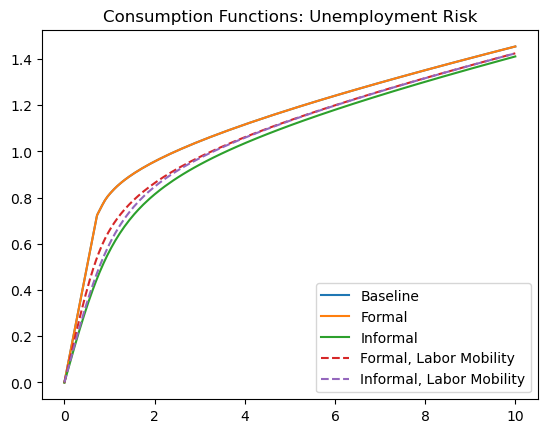

In [ ]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Baseline')
plt.plot(mGrid, Agent_formal_URisk.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_URisk.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_URisk.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_URisk.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.title('Consumption Functions: Unemployment Risk')
plt.savefig('../../figures/Consumption_Functions_URisk.png')
plt.show()

In [ ]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_URisk = C_SS_Formal_URisk * Formal_Size + C_SS_Informal_URisk * (1 - Formal_Size)
A_ss_NoMobility_URisk = A_SS_Formal_URisk * Formal_Size + A_SS_Informal_URisk * (1 - Formal_Size)

## Compare Steady States
print('Steady States:')
print('Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_URisk, A_SS_Formal_URisk))
print('Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_URisk, A_SS_Informal_URisk))
print('Two Sector Model: No Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_URisk, A_ss_NoMobility_URisk))
print('Two Sector Model: With Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_URisk, A_SS_TwoSector_URisk))

Steady States:
Formal Sector: Consumption 0.800 Assets 0.227
Informal Sector: Consumption 0.828 Assets 1.414
Two Sector Model: No Mobility: Consumption 0.806 Assets 0.464
Two Sector Model: With Mobility: Consumption 0.826 Assets 1.047


#### 1B) Lower wage rate in Informal sector

In [ ]:
wage_f = 1.0
wage_i = 0.8

In [ ]:
HANK_Dict_Formal_wage = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_wage['wage'] = [wage_f]

HANK_Dict_Informal_wage = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_wage['wage'] = [wage_i]

HANK_Dict_TwoSector_wage = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_wage['wage'] = [np.array([wage_f, wage_i])]



In [ ]:
Agent_formal_wage = IndShockConsumerType(**HANK_Dict_Formal_wage, verbose=False)
Agent_formal_wage.solve()
A_SS_Formal_wage, C_SS_Formal_wage = Agent_formal_wage.compute_steady_state()

Agent_informal_wage = IndShockConsumerType(**HANK_Dict_Informal_wage, verbose=False)
Agent_informal_wage.solve()
A_SS_Informal_wage, C_SS_Informal_wage = Agent_informal_wage.compute_steady_state()

Agent_TwoSector_wage = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_wage)
Agent_TwoSector_wage.solve()
A_SS_TwoSector_wage, C_SS_TwoSector_wage = Agent_TwoSector_wage.compute_steady_state()


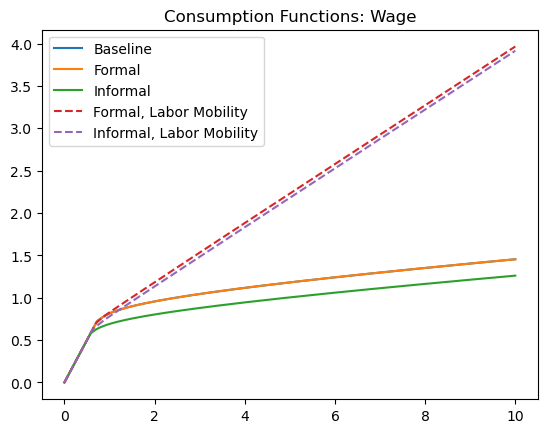

In [ ]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Baseline')
plt.plot(mGrid, Agent_formal_wage.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_wage.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_wage.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_wage.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.title('Consumption Functions: Wage')
plt.legend()
plt.savefig('../../figures/Consumption_Functions_Wage.png')
plt.show()

In [ ]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_wage = C_SS_Formal_wage * Formal_Size + C_SS_Informal_wage * (1 - Formal_Size)
A_ss_NoMobility_wage = A_SS_Formal_wage * Formal_Size + A_SS_Informal_wage * (1 - Formal_Size)

## Compare Steady States
print('Steady States:')
print('Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_wage, A_SS_Formal_wage))
print('Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_wage, A_SS_Informal_wage))
print('Two Sector Model: No Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_wage, A_ss_NoMobility_wage))
print('Two Sector Model: With Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_wage, A_SS_TwoSector_wage))

Steady States:
Formal Sector: Consumption 0.800 Assets 0.227
Informal Sector: Consumption 0.640 Assets 0.181
Two Sector Model: No Mobility: Consumption 0.768 Assets 0.218
Two Sector Model: With Mobility: Consumption 0.756 Assets 0.121


## Experiment 2: Financial Constraints

#### 1A) No Borrowing Constraint in Formal Sector

In [ ]:
BoroCnstArt_f = -0.5
BoroCnstArt_i = 0.0

In [ ]:
HANK_Dict_Formal_BoroCnst = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_BoroCnst['BoroCnstArt'] = [BoroCnstArt_f]

HANK_Dict_Informal_BoroCnst = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_BoroCnst['BoroCnstArt'] = [BoroCnstArt_i]

HANK_Dict_TwoSector_BoroCnst = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_BoroCnst['BoroCnstArt'] = [BoroCnstArt_f, BoroCnstArt_i]



In [ ]:
Agent_formal_BoroCnst = IndShockConsumerType(**HANK_Dict_Formal_BoroCnst, verbose=False)
Agent_formal_BoroCnst.solve()
A_SS_Formal_BoroCnst, C_SS_Formal_BoroCnst = Agent_formal_BoroCnst.compute_steady_state()

Agent_informal_BoroCnst = IndShockConsumerType(**HANK_Dict_Informal_BoroCnst, verbose=False)
Agent_informal_BoroCnst.solve()
A_SS_Informal_BoroCnst, C_SS_Informal_BoroCnst = Agent_informal_BoroCnst.compute_steady_state()

Agent_TwoSector_BoroCnst = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_BoroCnst)
Agent_TwoSector_BoroCnst.solve()
A_SS_TwoSector_BoroCnst, C_SS_TwoSector_BoroCnst = Agent_TwoSector_BoroCnst.compute_steady_state()

c:\Users\adria\anaconda3\envs\Durable\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: can only concatenate list (not "int") to list

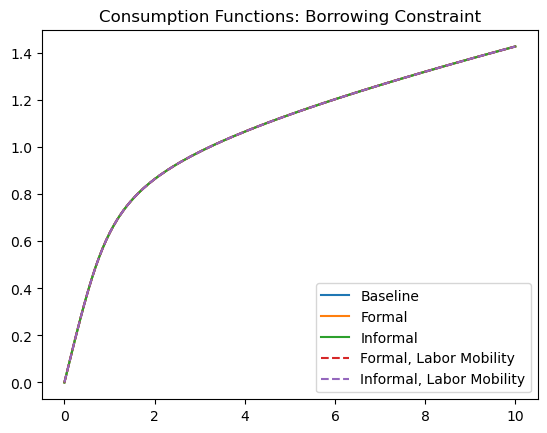

In [ ]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Baseline')
plt.plot(mGrid, Agent_formal_BoroCnst.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_BoroCnst.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_BoroCnst.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_BoroCnst.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.title('Consumption Functions: Borrowing Constraint')
plt.legend()
plt.savefig('../../figures/Consumption_Functions_BoroCnst.png')
plt.show()


In [ ]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_BoroCnst = C_SS_Formal_BoroCnst * Formal_Size + C_SS_Informal_BoroCnst * (1 - Formal_Size)
A_ss_NoMobility_BoroCnst = A_SS_Formal_BoroCnst * Formal_Size + A_SS_Informal_BoroCnst * (1 - Formal_Size)

## Compare Steady States
print('Steady States:')
print('Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_BoroCnst, A_SS_Formal_BoroCnst))
print('Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_BoroCnst, A_SS_Informal_BoroCnst))
print('Two Sector Model: No Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_BoroCnst, A_ss_NoMobility_BoroCnst))
print('Two Sector Model: With Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_BoroCnst, A_SS_TwoSector_BoroCnst))

Steady States:
Formal Sector: Consumption 0.819 Assets 1.009
Informal Sector: Consumption 0.819 Assets 1.009
Two Sector Model: No Mobility: Consumption 0.819 Assets 1.009
Two Sector Model: With Mobility: Consumption 0.819 Assets 1.009


#### 1B) Higher Interest Rate in Formal Sector

In [ ]:
Rfree_f = 0.03
Rfree_i = 0.00

In [ ]:
HANK_Dict_Formal_Rfree = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_Rfree['Rfree'] = 1 + Rfree_f

HANK_Dict_Informal_Rfree = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_Rfree['Rfree'] = 1 + Rfree_i

HANK_Dict_TwoSector_Rfree = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_Rfree['wage'] = [np.array([1 + Rfree_f, 1 + Rfree_i])]



In [ ]:
Agent_formal_Rfree = IndShockConsumerType(**HANK_Dict_Formal_Rfree, verbose=False)
Agent_formal_Rfree.solve()
A_SS_Formal_Rfree, C_SS_Formal_Rfree = Agent_formal_Rfree.compute_steady_state()

Agent_informal_Rfree = IndShockConsumerType(**HANK_Dict_Informal_Rfree, verbose=False)
Agent_informal_Rfree.solve()
A_SS_Informal_Rfree, C_SS_Informal_Rfree = Agent_informal_Rfree.compute_steady_state()

Agent_TwoSector_Rfree = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_Rfree)
Agent_TwoSector_Rfree.solve()
A_SS_TwoSector_Rfree, C_SS_TwoSector_Rfree = Agent_TwoSector_Rfree.compute_steady_state()



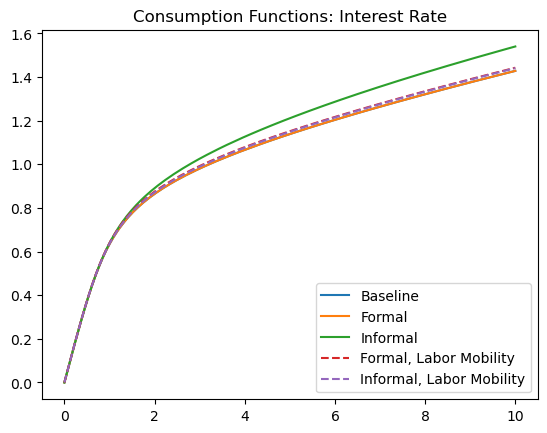

In [ ]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Baseline')
plt.plot(mGrid, Agent_formal_Rfree.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_Rfree.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_Rfree.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_Rfree.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.title('Consumption Functions: Interest Rate')
plt.savefig('../../figures/Consumption_Functions_Rfree.png')
plt.show()



In [ ]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_Rfree = C_SS_Formal_Rfree * Formal_Size + C_SS_Informal_Rfree * (1 - Formal_Size)
A_ss_NoMobility_Rfree = A_SS_Formal_Rfree * Formal_Size + A_SS_Informal_Rfree * (1 - Formal_Size)

## Compare Steady States
print('Steady States:')
print('Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_Rfree, A_SS_Formal_Rfree))
print('Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_Rfree, A_SS_Informal_Rfree))
print('Two Sector Model: No Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_Rfree, A_ss_NoMobility_Rfree))
print('Two Sector Model: With Mobility: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_Rfree, A_SS_TwoSector_Rfree))

Steady States:
Formal Sector: Consumption 0.819 Assets 1.009
Informal Sector: Consumption 0.790 Assets 0.780
Two Sector Model: No Mobility: Consumption 0.813 Assets 0.963
Two Sector Model: With Mobility: Consumption 0.834 Assets 1.035
